In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from datetime import datetime

# Data extraction from Yahoo Finance using the yfinance Python library

In [2]:
end = datetime.now()
end

datetime.datetime(2024, 5, 4, 16, 41, 7, 389693)

In [3]:
start_date = datetime(end.year-1,end.month,end.day)
start_date

datetime.datetime(2023, 5, 4, 0, 0)

In [4]:
stock_list=['AXISBANK.NS', 'ICICIBANK.NS','KOTAKBANK.NS','HDFCBANK.NS']

In [5]:
name_stock=[]
name_df=[]

for stock_symbol in stock_list:
    df = yf.download(stock_symbol, start=start_date, end=end, progress=False)  # Download data for the current stock

    df.reset_index(inplace=True)  # Reset index

    stock_name = stock_symbol.split('.')[0]  # Extract stock name from symbol
    name_stock.append(stock_name)

    df['Company'] = stock_name    # Add a column for Company with the stock name

    df_name = f"{stock_name.lower()}_df"  # Define DataFrame name dynamically using the stock name
    name_df.append(df_name)

    globals()[df_name] = df  # Assign the DataFrame to the dynamically created name

In [6]:
name_df

['axisbank_df', 'icicibank_df', 'kotakbank_df', 'hdfcbank_df']

In [7]:
name_stock

['AXISBANK', 'ICICIBANK', 'KOTAKBANK', 'HDFCBANK']

# Line plot for each company - Change in stock price over time

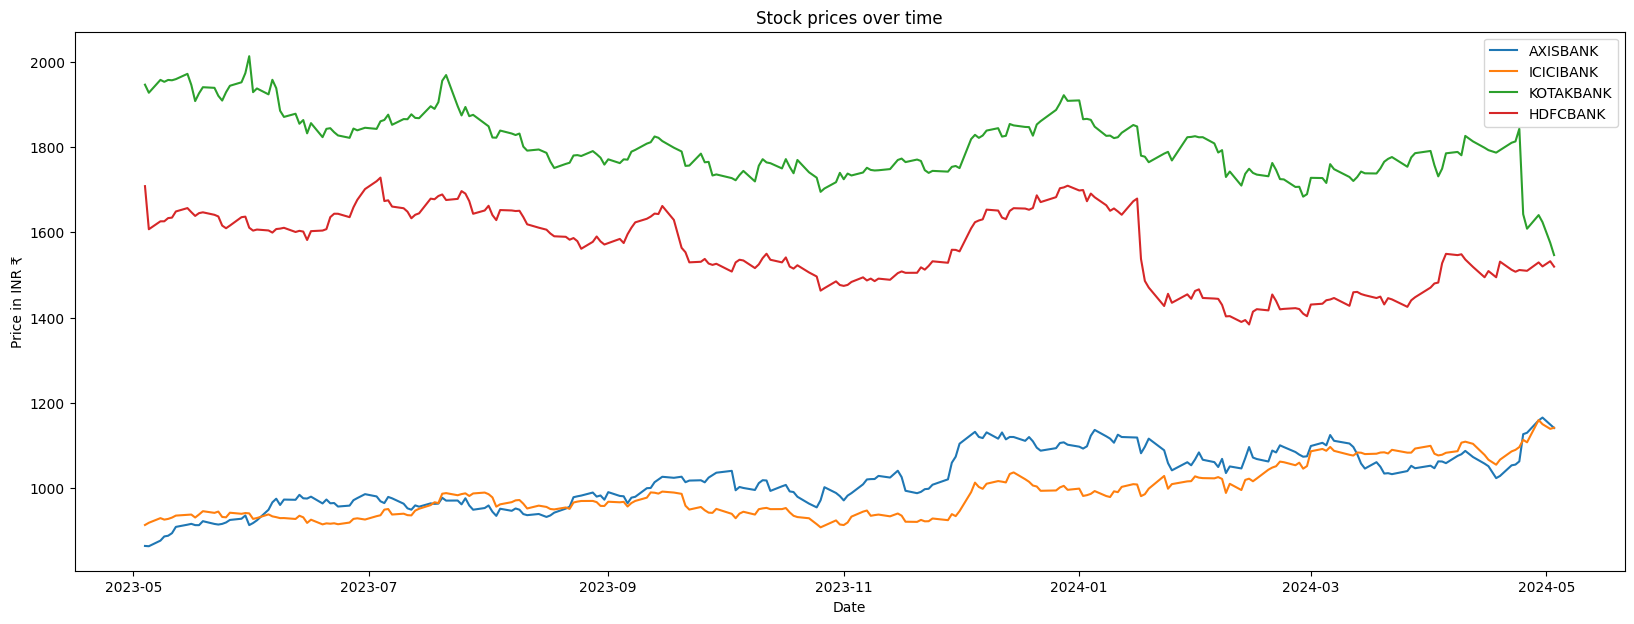

In [8]:
plt.figure(figsize=(20, 7))
for df_name, stock_name in zip(name_df, name_stock):
    df = globals()[df_name]
    plt.plot(df['Date'], df['Adj Close'], label=stock_name)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel("Price in INR ₹")
plt.title("Stock prices over time")
plt.legend()
plt.show()

# Line plot for each company - Change in a stock’s volume being traded over time

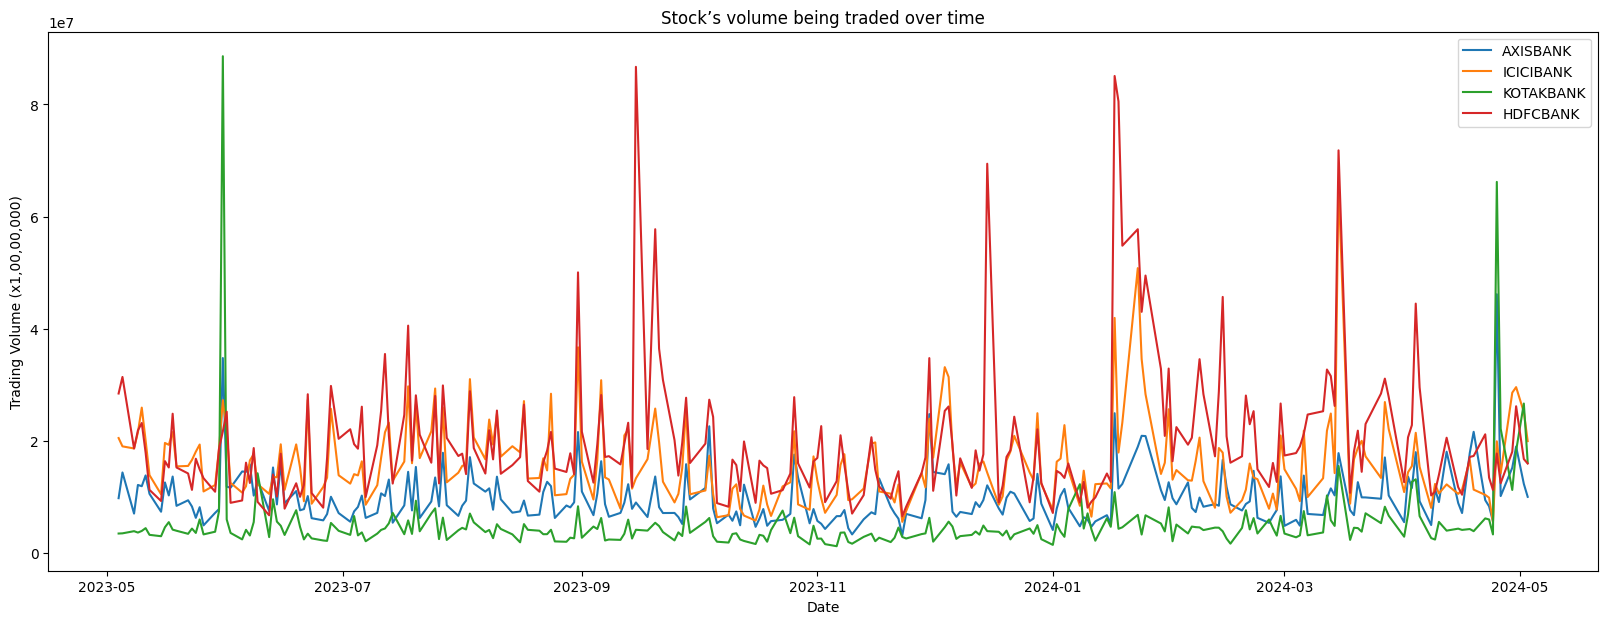

In [9]:
plt.figure(figsize=(20, 7))
for df_name, stock_name in zip(name_df, name_stock):
    df = globals()[df_name]
    plt.plot(df['Date'], df['Volume'], label=stock_name)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel("Trading Volume (x1,00,00,000)")
plt.title("Stock’s volume being traded over time")
plt.legend()
plt.show()

# Line plot for each company - Moving average of various stocks

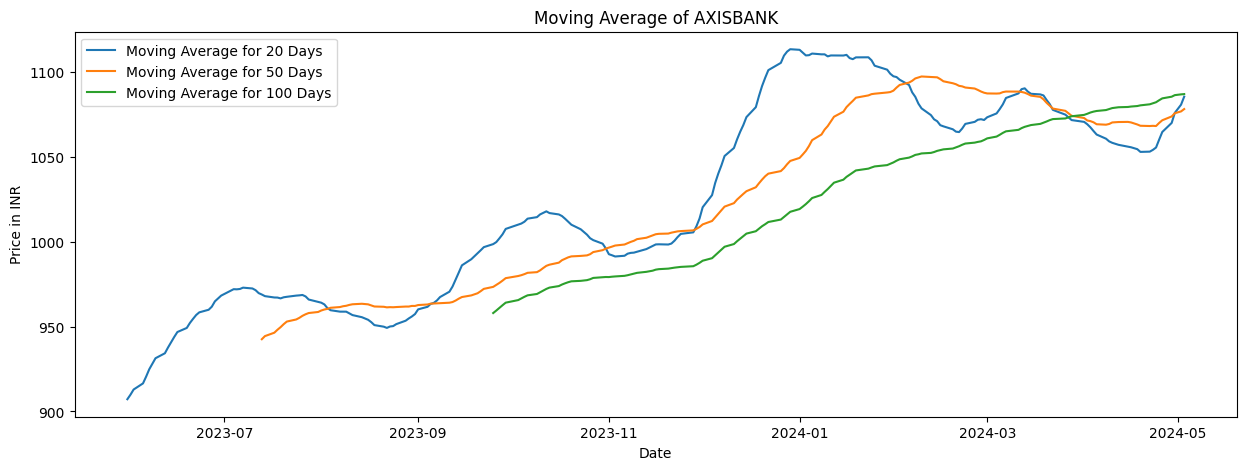

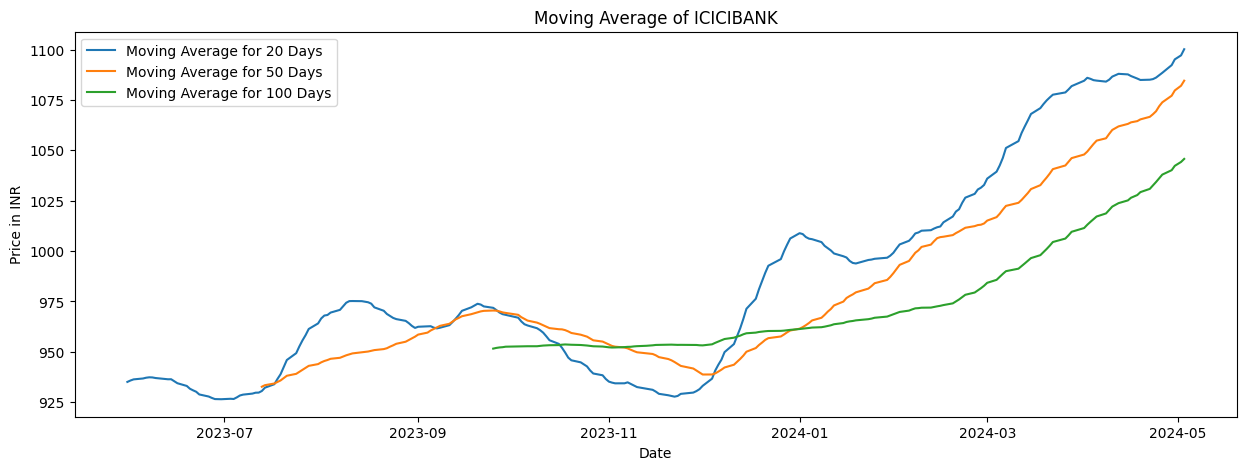

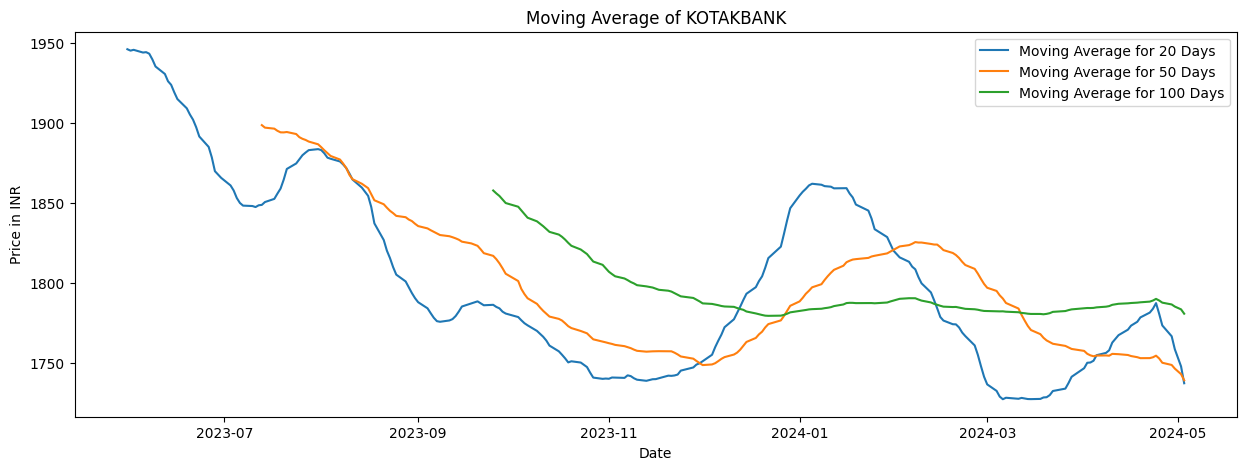

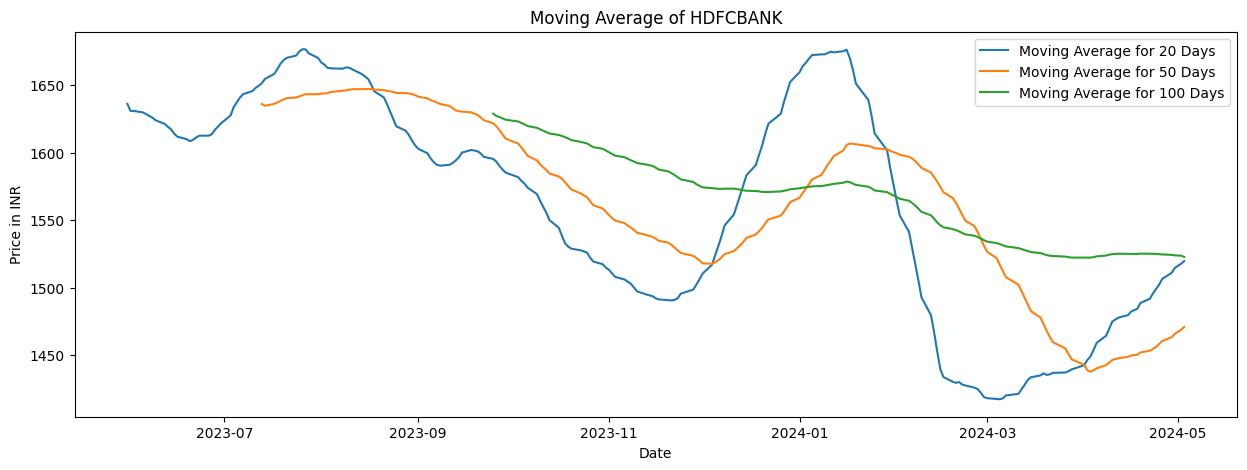

In [10]:
for df_name, stock_name in zip(name_df, name_stock):
    df = globals()[df_name]  # Access DataFrame by name
    df['MA for 20 Days'] = df['Adj Close'].rolling(20).mean()
    df['MA for 50 Days'] = df['Adj Close'].rolling(50).mean()
    df['MA for 100 Days'] = df['Adj Close'].rolling(100).mean()

    plt.figure(figsize=(15, 5))
    plt.plot(df['Date'], df['MA for 20 Days'], label="Moving Average for 20 Days")
    plt.plot(df['Date'], df['MA for 50 Days'], label="Moving Average for 50 Days")
    plt.plot(df['Date'], df['MA for 100 Days'], label="Moving Average for 100 Days")
    plt.xlabel("Date")
    plt.ylabel("Price in INR")
    plt.title(f"Moving Average of {stock_name}")
    plt.legend()
    plt.show()

# Line plot for each company - Daily Return average of various stocks

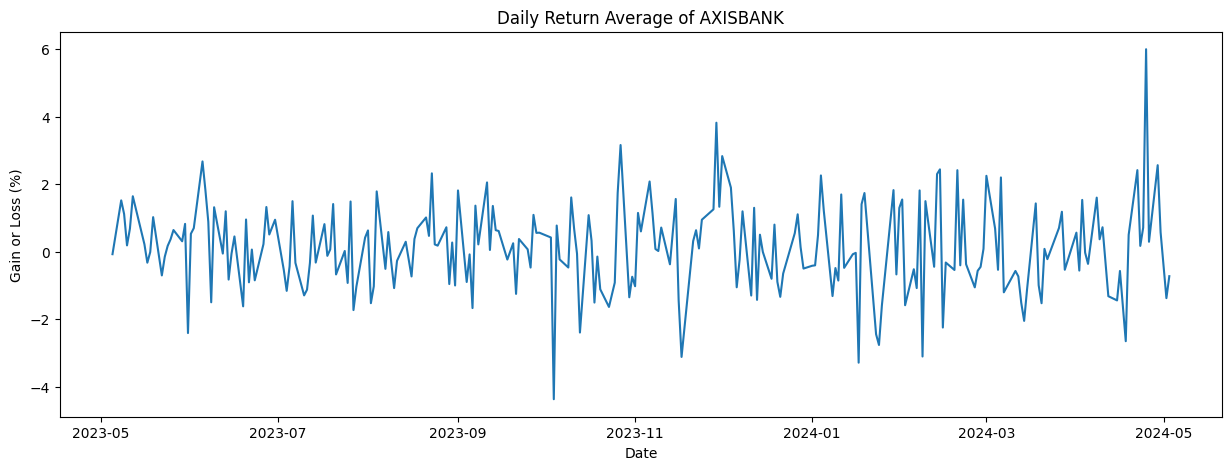

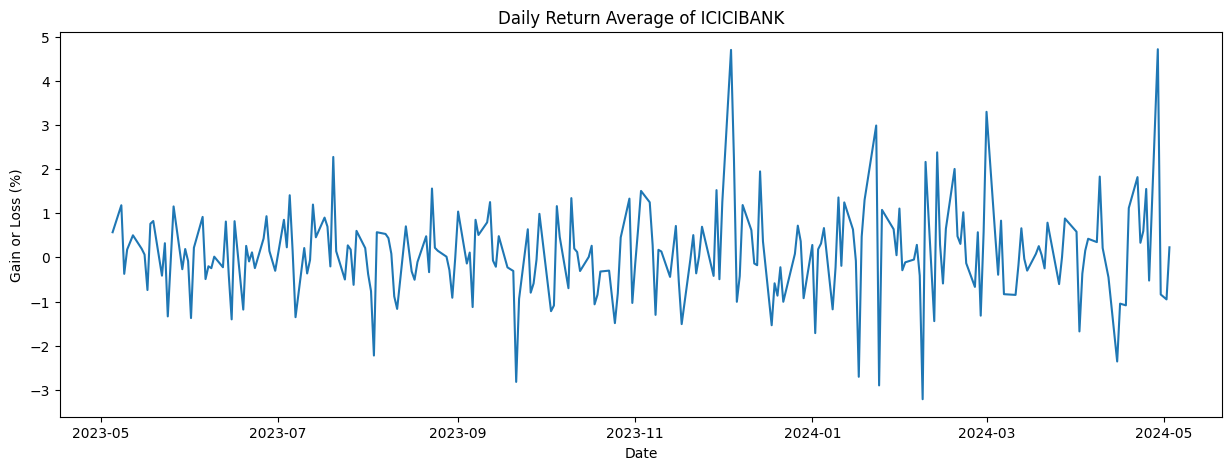

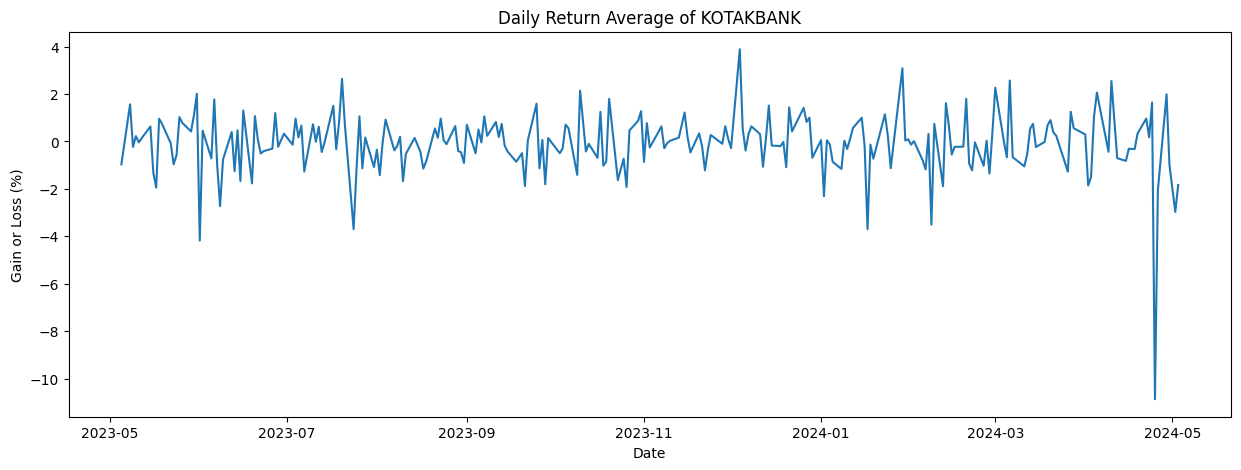

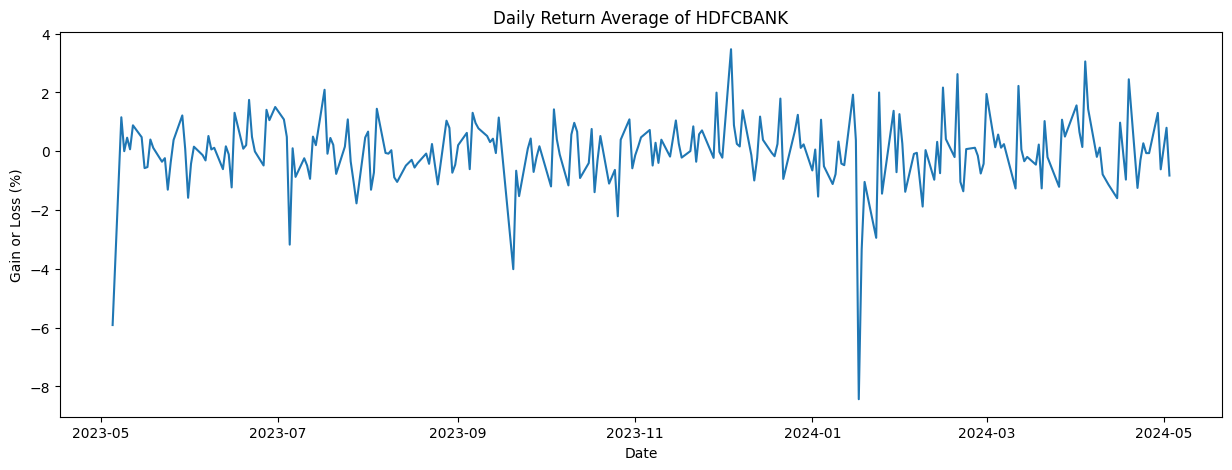

In [11]:
for df_name, stock_name in zip(name_df, name_stock):
    df = globals()[df_name]  # Access DataFrame by name
    df['Daily Return %'] = df['Adj Close'].pct_change()* 100
    plt.figure(figsize=(15, 5))
    plt.plot(df['Date'],df['Daily Return %'])
    plt.xlabel("Date")
    plt.ylabel("Gain or Loss (%)")
    plt.title(f"Daily Return Average of {stock_name}")
    #plt.legend()
    plt.show()

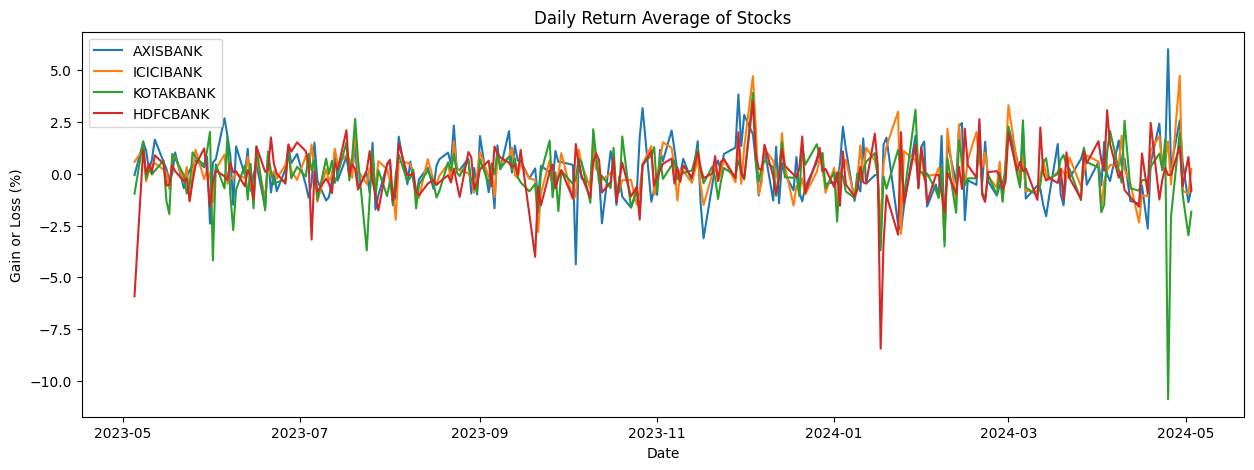

In [12]:
plt.figure(figsize=(15, 5))
for df_name, stock_name in zip(name_df, name_stock):
    df = globals()[df_name]  # Access DataFrame by name
    df['Daily Return %'] = df['Adj Close'].pct_change()* 100
    plt.plot(df['Date'],df['Daily Return %'],label=stock_name)

plt.xlabel("Date")
plt.ylabel("Gain or Loss (%)")
plt.title("Daily Return Average of Stocks")
plt.legend()
plt.show()

# Adding a new column ‘Trend’ whose values are based on the 'Daily Return' & Visualizing trend frequency through a Pie Chart

In [13]:
def trend(x):
  if x > -1.5 and x <= 1.5:
    return 'Slight or No change'
  elif x > 1.5 and x <= 4:
    return 'Slight Positive'
  elif x < -1.5 and x >= -4:
    return 'Slight Negative'
  elif x > 4 and x <= 6:
    return 'Positive'
  elif x < -4 and x >= -6:
    return 'Negative'
  elif x > 6 and x <= 7:
    return 'Among top gainers'
  elif x < -6 and x >= -7:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'

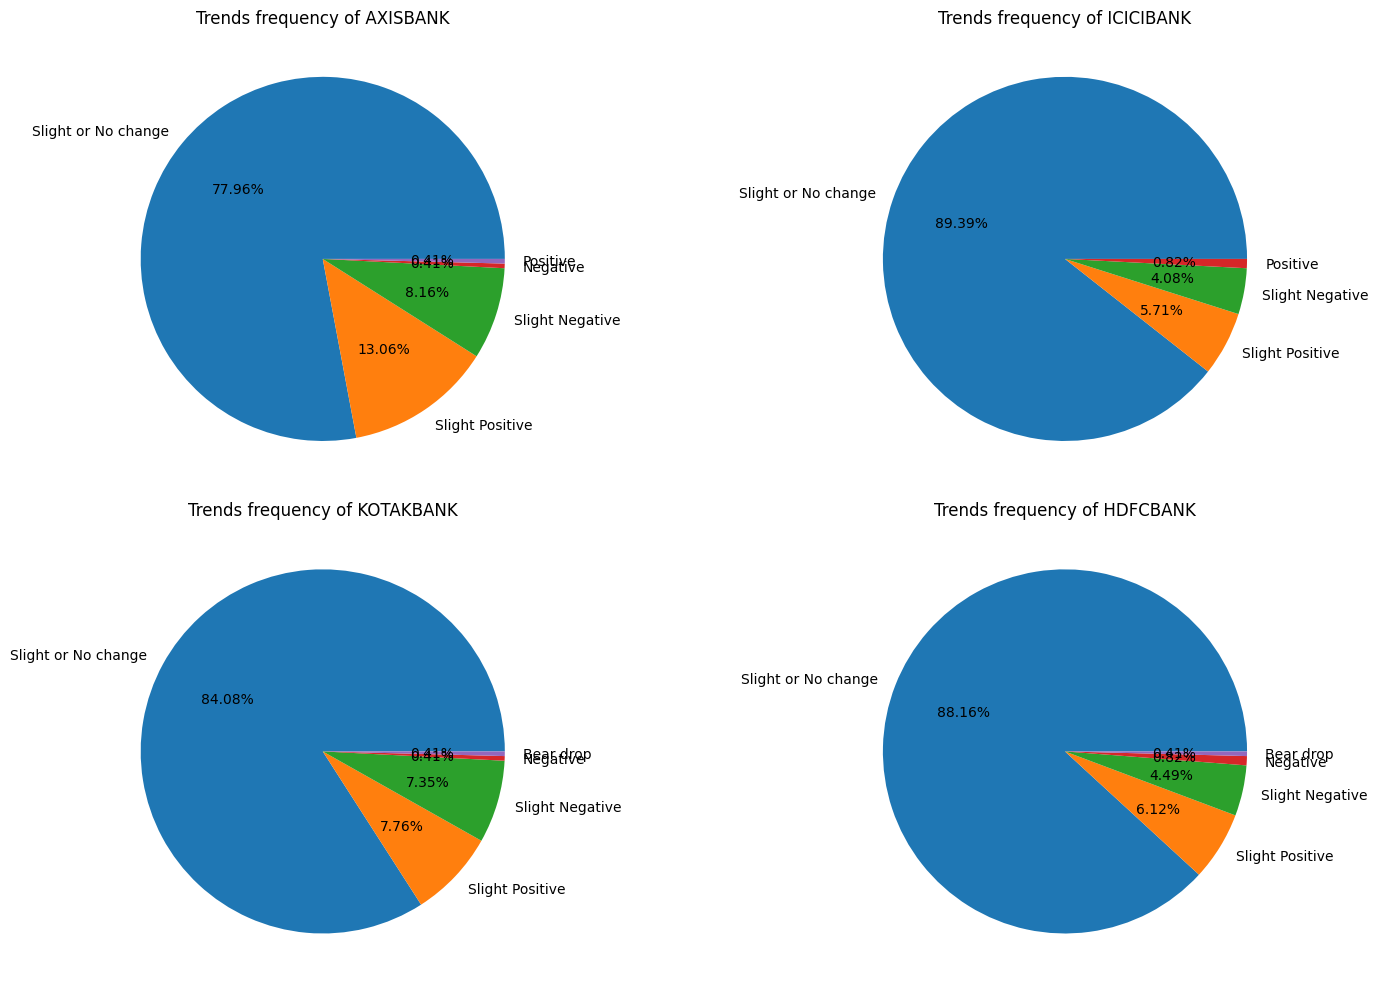

In [14]:
# Initialize the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterate through each DataFrame and plot the pie chart on respective subplot
for i, (df_name, stock_name) in enumerate(zip(name_df, name_stock)):
    df = globals()[df_name]  # Access DataFrame by name
    df['Trend'] = df['Daily Return %'].apply(lambda x: trend(x))
    trendpie = df['Trend'].value_counts()

    # Calculate the row and column index for subplot
    row_index = i // 2
    col_index = i % 2

    # Plot the pie chart on respective subplot
    axes[row_index, col_index].pie(trendpie.values, labels=trendpie.index, autopct='%1.2f%%')
    axes[row_index, col_index].set_title(f"Trends frequency of {stock_name}")

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation between the daily returns of different stocks

In [15]:
# Create a DataFrame from selected columns of each DataFrame using name_df and name_stock
df = pd.DataFrame({stock_name: globals()[df_name]['Adj Close'] for df_name, stock_name in zip(name_df, name_stock)})

In [16]:
df

,AXISBANK,ICICIBANK,KOTAKBANK,HDFCBANK
0,865.067261,914.175171,1945.997681,1708.210449
1,864.417908,919.382263,1927.113159,1607.218628
2,877.554504,930.242920,1957.238403,1625.805420
3,887.344482,926.771484,1952.692261,1625.854858
4,888.992859,928.407959,1957.088501,1633.368652
...,...,...,...,...
241,1130.300049,1107.900024,1608.500000,1509.800049
242,1159.250000,1160.150024,1640.400024,1529.500000
243,1165.900024,1150.400024,1623.949951,1520.099976
244,1149.849976,1139.449951,1575.650024,1532.250000


In [17]:
df.corr()

,AXISBANK,ICICIBANK,KOTAKBANK,HDFCBANK
AXISBANK,1.000000,0.695754,-0.477334,-0.330993
ICICIBANK,0.695754,1.000000,-0.397763,-0.425357
KOTAKBANK,-0.477334,-0.397763,1.000000,0.703226
HDFCBANK,-0.330993,-0.425357,0.703226,1.000000


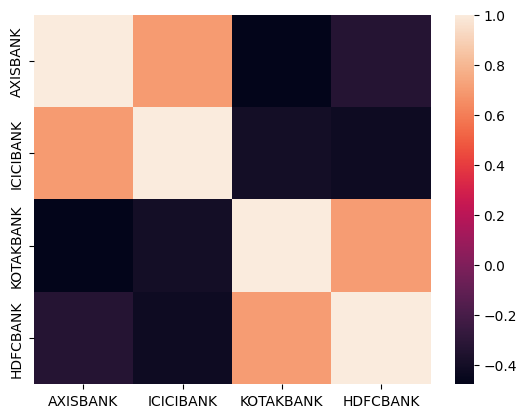

In [18]:
sns.heatmap(df.corr())
plt.show()